# Note

The following tutorial is accumulated from google colab's official tutorial.
Possible additional comments, tips and tricks are added here and there.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/16pBJQePbqkz3QFV54L4NIkOn1kwpuRrj#scrollTo=BCmeo64HcLfs)

Important concepts.

1. Connect
2. Code Cell
3. Text Cell
4. Runtime


In [ ]:
print("Hello world")

Hello world


<p><img alt="Colaboratory logo" height="45px" src="/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px"></p>

<h1>Google Colaboratory!</h1>


Colaboratory is a free Jupyter notebook environment that requires no setup and runs entirely in the cloud.

With Colaboratory you can write and execute code, save and share your analyses, and access powerful computing resources, all for free from your browser.

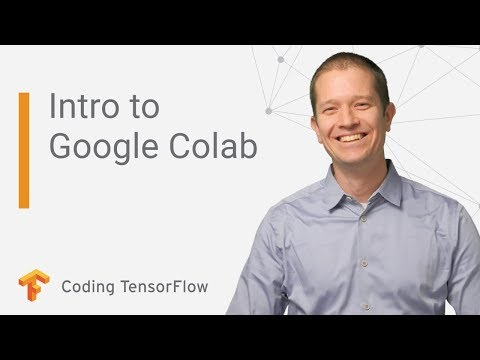

In [ ]:
#@title Introducing Colaboratory { display-mode: "form" }
#@markdown This 3-minute video gives an overview of the key features of Colaboratory:
from IPython.display import YouTubeVideo
YouTubeVideo('inN8seMm7UI', width=600, height=400)

# Virtual Machine
The most powerful feature of google colab is the ability to use cloud GPU for free. Like the other desktop environment you can also access most of the bash command with a `!` added in the front of the command.

At first turn on the GPU from `Runtime`->`Change Runtime Type`->`Hardware Acceleration`

The entire colab runs in a cloud VM. Let's investigate the VM. You will see that the current colab notebook is running on top of `Ubuntu 18.04.3 LTS` (at the time of this writing.)

In [ ]:
!ls -l
!pwd

total 8
drwx------ 3 root root 4096 Nov  9 04:17 drive
drwxr-xr-x 1 root root 4096 Nov  6 16:17 sample_data
/content


In [ ]:
!ls -l /


total 104
drwxr-xr-x   1 root root 4096 Oct 25 16:51 bin
drwxr-xr-x   2 root root 4096 Apr 24  2018 boot
drwxr-xr-x   1 root root 4096 Nov  9 04:17 content
drwxr-xr-x   1 root root 4096 Nov  6 16:52 datalab
drwxr-xr-x   5 root root  440 Nov  9 03:56 dev
drwxr-xr-x   1 root root 4096 Nov  9 03:56 etc
drwxr-xr-x   2 root root 4096 Apr 24  2018 home
drwxr-xr-x   1 root root 4096 Oct 25 16:53 lib
drwxr-xr-x   2 root root 4096 Oct 25 16:44 lib32
drwxr-xr-x   2 root root 4096 Aug  7 13:03 lib64
drwxr-xr-x   2 root root 4096 Aug  7 13:02 media
drwxr-xr-x   2 root root 4096 Aug  7 13:02 mnt
drwxr-xr-x   1 root root 4096 Nov  9 03:56 opt
dr-xr-xr-x 124 root root    0 Nov  9 03:56 proc
drwx------   1 root root 4096 Nov  9 04:17 root
drwxr-xr-x   1 root root 4096 Oct 25 16:51 run
drwxr-xr-x   1 root root 4096 Oct 25 16:52 sbin
drwxr-xr-x   2 root root 4096 Aug  7 13:02 srv
drwxr-xr-x   4 root root 4096 Nov  6 16:51 swift
dr-xr-xr-x  12 root root    0 Nov  9 04:14 sys
drwxr-xr-x   1 root root 4096

In [ ]:
!cat /etc/*release

DISTRIB_ID=Ubuntu
DISTRIB_RELEASE=18.04
DISTRIB_CODENAME=bionic
DISTRIB_DESCRIPTION="Ubuntu 18.04.3 LTS"
NAME="Ubuntu"
VERSION="18.04.3 LTS (Bionic Beaver)"
ID=ubuntu
ID_LIKE=debian
PRETTY_NAME="Ubuntu 18.04.3 LTS"
VERSION_ID="18.04"
HOME_URL="https://www.ubuntu.com/"
SUPPORT_URL="https://help.ubuntu.com/"
BUG_REPORT_URL="https://bugs.launchpad.net/ubuntu/"
PRIVACY_POLICY_URL="https://www.ubuntu.com/legal/terms-and-policies/privacy-policy"
VERSION_CODENAME=bionic
UBUNTU_CODENAME=bionic


# GPU Details

The GPU details can be accessed by `!nvidia-smi`.

In [ ]:
!nvidia-smi

Sat Nov  9 05:25:53 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 430.50       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8     9W /  70W |      0MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

# Ubuntu 18.04.3 LTS and drivers

Now that, as you are using ubuntu, you can use any command that you use from GNU terminal. This makes life very simple.

However, for your project you have have to find a way to transfer/download your data files here in this VM. The easiest way is to mound your google drive here in this VM and use git for version control of your codes.

Another easiest way is to get your file is to use `wget` from a file server or dropbox.



To install a python package with pip use following.
You can also use `apt-get` to install any package in ubuntu.

In [ ]:
!pip install gpustat
!pip install fairseq
!apt-get install build-essential

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
!gpustat

25193fa42234         Sat Nov  9 05:27:08 2019  418.67
[0] Tesla T4         | 36'C,   0 % |     0 / 15079 MB |



Please check the nvidia driver version (see the output of `!nvidia-smi` above), cuda version in current OS. Because not all version support the latest cuda, cudnn etc. Deep learning libraries are changing at a rapid pace. So make sure that you can install your preferred deep learning library with the current nvidia-driver, cuda and cudnn.

In [ ]:
from platform import python_version
import torch
print("Python version", python_version())
print("Pytorch - version", torch.__version__)
print("Pytorch - cuDNN version :", torch.backends.cudnn.version())

Python version 3.6.8
Pytorch - version 1.3.0+cu100
Pytorch - cuDNN version : 7603


# Data uploading to VM
1. From Machine  -- explore the built in left panel of google colab
2. From google drive -- explore the built in  left panel  of google colab
3. with wget


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pwd

/content


In [ ]:
!wget  https://dl.fbaipublicfiles.com/XLM/codes_xnli_100

--2019-11-09 05:28:50--  https://dl.fbaipublicfiles.com/XLM/codes_xnli_100
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.20.6.166, 104.20.22.166, 2606:4700:10::6814:6a6, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.20.6.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2973279 (2.8M) [text/plain]
Saving to: ‘codes_xnli_100.1’

codes_xnli_100.1    100%[===================>]   2.83M  2.74MB/s    in 1.0s    

2019-11-09 05:28:52 (2.74 MB/s) - ‘codes_xnli_100.1’ saved [2973279/2973279]



In [ ]:
!ls -l

total 5816
-rw-r--r-- 1 root root 2973279 Aug 18 02:44 codes_xnli_100
-rw-r--r-- 1 root root 2973279 Aug 18 02:44 codes_xnli_100.1
drwx------ 3 root root    4096 Nov  9 04:17 drive
drwxr-xr-x 1 root root    4096 Nov  6 16:17 sample_data


In [ ]:
!head -n 10 codes_xnli_100

a n 58300410
e r 55874871
e n 48332651
i n 46367809
a r 42047014
s t 41963553
a l 34495577
e n</w> 33743928
o n 30604783
o r 30086868


In [ ]:
!git clone https://github.com/ntunlp/MH6812-SPMS-2019

fatal: destination path 'MH6812-SPMS-2019' already exists and is not an empty directory.


In [ ]:
!ls -l CE-7455-SPMS-2019

total 4
-rw-r--r-- 1 root root 42 Nov  5 18:55 README.md


## Getting Started

The document you are reading is a  [Jupyter notebook](https://jupyter.org/), hosted in Colaboratory. It is not a static page, but an interactive environment that lets you write and execute code in Python and other languages.

For example, here is a **code cell** with a short Python script that computes a value, stores it in a variable, and prints the result:

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

In [ ]:
var = 1
name = 'NTU'
print(name)

NTU


To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut "Command/Ctrl+Enter".

All cells modify the same global state, so variables that you define by executing a cell can be used in other cells:

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

For more information about working with Colaboratory notebooks, see [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb).


# Important Resources

Learn how to make the most of Python, Jupyter, Colaboratory, and related tools with these resources:

### Working with Notebooks in Colaboratory
- [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb)  
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)


# Additional Content
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)
- <img src="/img/new.png" height="20px" align="left" hspace="4px" alt="New"></img>
 [TensorFlow 2 in Colab](/notebooks/tensorflow_version.ipynb)

### Working with Data
- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb)
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

### Machine Learning Crash Course
These are a few of the notebooks from Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Intro to Pandas](/notebooks/mlcc/intro_to_pandas.ipynb)
- [Tensorflow concepts](/notebooks/mlcc/tensorflow_programming_concepts.ipynb)
- [First steps with TensorFlow](/notebooks/mlcc/first_steps_with_tensor_flow.ipynb)
- [Intro to neural nets](/notebooks/mlcc/intro_to_neural_nets.ipynb)
- [Intro to sparse data and embeddings](/notebooks/mlcc/intro_to_sparse_data_and_embeddings.ipynb)

### Using Accelerated Hardware
- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TensorFlow with TPUs](/notebooks/tpu.ipynb)